Загружаем нужные библиотеки:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import io
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Загружаем датасет:

In [4]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/2_bookings.csv', sep = ';')
df

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,2017,August,35,30,2,5,...,2,0.0,0,BB,BEL,A,A,Transient,Check-Out,2017-09-06
119386,City Hotel,0,102,2017-08-31,2017,August,35,31,2,5,...,3,0.0,0,BB,FRA,E,E,Transient,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-08-31,2017,August,35,31,2,5,...,2,0.0,0,BB,DEU,D,D,Transient,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-08-31,2017,August,35,31,2,5,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2017-09-07


In [5]:
df.shape

(119390, 21)

Поиск пропущенных значений:

In [6]:
df.dtypes

Hotel                         object
Is Canceled                    int64
Lead Time                      int64
arrival full date             object
Arrival Date Year              int64
Arrival Date Month            object
Arrival Date Week Number       int64
Arrival Date Day of Month      int64
Stays in Weekend nights        int64
Stays in week nights           int64
stays total nights             int64
Adults                         int64
Children                     float64
Babies                         int64
Meal                          object
Country                       object
Reserved Room Type            object
Assigned room type            object
customer type                 object
Reservation Status            object
Reservation status_date       object
dtype: object

In [7]:
nan = df.isna().sum().sum()
df.dropna(inplace=True)
has_nan = df.isnull().values.any()
has_nan

False

Выражение суммы пропущенных значений в процентах

In [8]:
number_all_values = df.size
nan_in_procent = (nan/number_all_values)*100
print(nan_in_procent)

0.019704764948587385


Поиск выбросов:

In [9]:
# Вычисляем первый и третий квартили
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Вычисляем межквартильный размах
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = df[(df < lower_bound) | (df > upper_bound)]

# Выводим количество выбросов в процентах
outliers_percentage = (outliers.count() / df.count()) * 100
print(outliers_percentage)


<ipython-input-9-b6808d23141e>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-9-b6808d23141e>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-9-b6808d23141e>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df < lower_bound) | (df > upper_bound)]


Hotel                         0.000000
Is Canceled                   0.000000
Lead Time                     2.508032
arrival full date             0.000000
Arrival Date Year             0.000000
Arrival Date Month            0.000000
Arrival Date Week Number      0.000000
Arrival Date Day of Month     0.000000
Stays in Weekend nights       0.221198
Stays in week nights          2.809972
stays total nights            4.403775
Adults                       24.729600
Children                      7.215428
Babies                        0.768726
Meal                          0.000000
Country                       0.000000
Reserved Room Type            0.000000
Assigned room type            0.000000
customer type                 0.000000
Reservation Status            0.000000
Reservation status_date       0.000000
dtype: float64


Несбалансированные классы:

In [10]:
#df['Hotel'].describe()
counts = df['Hotel'].value_counts()
print(counts)
procent = (40060/119390)*100
print(procent)

City Hotel      79302
Resort Hotel    39596
Name: Hotel, dtype: int64
33.55389898651479


 **Д/з к 10.11**

# **Описание задачи :**
 Данная задача является задачей классификации двух классов отелей:

*   Resort Hotel
*   City Hotel


# **Описание признаков, используемых в задаче:**


*   **Hotel** - тип отеля
*   **Is Canceled** - отмена бронирования (0 - нет отмены, 1 - отмена)
*   **Lead Time** - период бронирования
*   **Arrival full date** - дата прибытия
*   **Arrival Date Year** - год прибытия
*   **Arrival Date Month** - неделя прибытия
*   **Arrival date Week Numder** - номер недели прибытия
*   **Arrival Date Day of Month** - день прибытия
*   **Stays in Weekend nights** - бронирование на выходные
*   **Stays in week nights** - бронирование на будни
*   **Stays in total nights** - общее бронирование, куда включены и будни и выходные дни
*   **Adults** - количество взрослых гостей
*   **Children** - количество детей
*   **Babies** - количество новорожденных
*   **Meal** - тип питания (BB (только завтрак), HB(завтрак+ужин), FB(завтрак + обед + ужин))
*   **Contry** - страна
*   **Reserved Room Type** - тип забронированного номера (A-H)
*   **Assigned Room Type** - тип номера, данного по факту
*   **Customer Type** - тип клиента (transient (временный), transient-party(временный сторонний), contract(контрактный) )
*   **Reservation Status** - статус резервации (Check-Out, Canseled, Check-In)
*   **Reservation status date** - дата выселения





1.   числовые признаки - год, неделя, число заезда в отель, количество взрослых, детей и малышей, период бронирования, количество ночей
2.   категориальные - тип комнаты, тип питания, тип клиента, стутус клиента, название месяца
3.   бинарные - отмена бронирования
4. временные - даты заезда и выселения

In [11]:
# Настройка типов признаков в Pandas dataframe
df['Hotel'] = df['Hotel'].astype('category')
df['Is Canceled'] = df['Is Canceled'].astype('category')
#df['Lead Time'] = df['Lead Time'].astype('category')
df['arrival full date'] = df['arrival full date'].astype('datetime64')
df['Float arrival full date'] = df['arrival full date'].apply(lambda x: x.value * 1e-9)
df = df.drop('arrival full date', axis=1)
#df['Arrival Date Year'] = df['Arrival Date Year'].astype('category')
df['Arrival Date Month'] = df['Arrival Date Month'].astype('category')
#df['Arrival Date Week Number'] = df['Arrival Date Week Number'].astype('category')
#df['Arrival Date Day of Month'] = df['Arrival Date Day of Month'].astype('category')
#df['Stays in Weekend nights'] = df['Stays in Weekend nights'].astype('category')
#df['Stays in week nights'] = df['Stays in week nights'].astype('category')
#df['stays total nights'] = df['stays total nights'].astype('category')
#df['Adults'] = df['Adults'].astype('int64')
#df['Children'] = df['Children'].astype('int64')
df['Babies'] = df['Babies'].astype('int64')
df['Meal'] = df['Meal'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Reserved Room Type'] = df['Reserved Room Type'].astype('category')
df['Assigned room type'] = df['Assigned room type'].astype('category')
df['customer type'] = df['customer type'].astype('category')
df['Reservation Status'] = df['Reservation Status'].astype('category')
df['Reservation status_date'] = df['Reservation status_date'].astype('datetime64')
df['Float Reservation status_date'] = df['Reservation status_date'].apply(lambda x: x.value * 1e-9)
df = df.drop('Reservation status_date', axis=1)

numerical_columns = [c for c in df.columns if df[c].dtype.name != 'category']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   Hotel                          118898 non-null  category
 1   Is Canceled                    118898 non-null  category
 2   Lead Time                      118898 non-null  int64   
 3   Arrival Date Year              118898 non-null  int64   
 4   Arrival Date Month             118898 non-null  category
 5   Arrival Date Week Number       118898 non-null  int64   
 6   Arrival Date Day of Month      118898 non-null  int64   
 7   Stays in Weekend nights        118898 non-null  int64   
 8   Stays in week nights           118898 non-null  int64   
 9   stays total nights             118898 non-null  int64   
 10  Adults                         118898 non-null  int64   
 11  Children                       118898 non-null  float64 
 12  Babies          

Информация о числовых признаках:

In [12]:
df.describe(include=['int64', 'float64'])

,Lead Time,Arrival Date Year,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,stays total nights,Adults,Children,Babies,Float arrival full date,Float Reservation status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,1.188980e+05,1.188980e+05
mean,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,3.431042,1.858391,0.104207,0.007948,1.472438e+09,1.469864e+09
std,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,2.544938,0.578576,0.399172,0.097380,1.932593e+07,1.981349e+07
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.435709e+09,1.413504e+09
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.457914e+09,1.454371e+09
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.473206e+09,1.470614e+09
75%,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,4.000000,2.000000,0.000000,0.000000,1.489882e+09,1.486598e+09
max,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,57.000000,55.000000,10.000000,10.000000,1.504138e+09,1.505347e+09


1. min – минимальное значение признака в таблице
2. max – максимальное значение
3. mean – среднее значение
4. std – среднеквадратическое отклонение (степень отклонения значений от среднего)
5. 25% – 0.25-квантиль (25-й перцентиль, или первый квартиль) – значение, ниже которого лежит 25% значений
6. 50% – медиана – значение, 50% значений меньше которого, а другие 50% больше
7. 75% – 0.75-квантиль (75-й перцентиль, или третий квартиль) – значение, ниже которого лежит около 75%, т.е. 75% значений меньше данного.

Максимум дней, проведённых в отеле был 30 дней.
Первый посетитель был в 2015 году. В среднем приезжают по 2 взрослых гостя.

Построим матрицу корреляции для числовых признаков:

In [13]:
corrMatrix = df.select_dtypes(include=['int64','float64']).corr()
corrMatrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,Lead Time,Arrival Date Year,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,stays total nights,Adults,Children,Babies,Float arrival full date,Float Reservation status_date
Lead Time,1.000000,0.039924,0.126738,0.002320,0.083984,0.164783,0.155910,0.116799,-0.038335,-0.021149,0.101114,-0.072878
Arrival Date Year,0.039924,1.000000,-0.540493,-0.000590,0.021669,0.031754,0.032191,0.029146,0.054492,-0.013183,0.933747,0.896130
Arrival Date Week Number,0.126738,-0.540493,1.000000,0.066839,0.017642,0.015007,0.018111,0.025394,0.005494,0.010039,-0.203702,-0.212535
Arrival Date Day of Month,0.002320,-0.000590,0.066839,1.000000,-0.015920,-0.027608,-0.026845,-0.001837,0.014562,-0.000539,0.027539,0.031955
Stays in Weekend nights,0.083984,0.021669,0.017642,-0.015920,1.000000,0.494888,0.760956,0.090410,0.045430,0.018396,0.031790,0.046504
Stays in week nights,0.164783,0.031754,0.015007,-0.027608,0.494888,1.000000,0.940370,0.091999,0.044259,0.020157,0.043280,0.037423
stays total nights,0.155910,0.032191,0.018111,-0.026845,0.760956,0.940370,1.000000,0.104082,0.050830,0.022252,0.044759,0.046145
Adults,0.116799,0.029146,0.025394,-0.001837,0.090410,0.091999,0.104082,1.000000,0.029590,0.017887,0.045228,0.023429
Children,-0.038335,0.054492,0.005494,0.014562,0.045430,0.044259,0.050830,0.029590,1.000000,0.024131,0.065770,0.069775
Babies,-0.021149,-0.013183,0.010039,-0.000539,0.018396,0.020157,0.022252,0.017887,0.024131,1.000000,-0.011119,-0.002734


Из таблицы можем заметить, что высокая корреляция между признаками, отражающими количество забронированных ночей, что вполне оправдано. И корреляция между годом и детой приезда тоже вполне оправдана.

**Информация о категориальных признаках**

In [14]:
df.describe(include=['category'])

,Hotel,Is Canceled,Arrival Date Month,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,2,12,5,177,10,12,4,3
top,City Hotel,0,August,BB,PRT,A,A,Transient,Check-Out
freq,79302,74745,13852,91863,48586,85601,73863,89174,74745


Выводы: City Hotel самый популярный тип отелей. Отмен броней крайне мало. Больше всего гостей в августе. Самый популярный тип питания - BB. Половина гостей приезжает из PRT. Больше половины гостей бронируют комнату типа А, но не все её получают.

#**Визуализация данных**

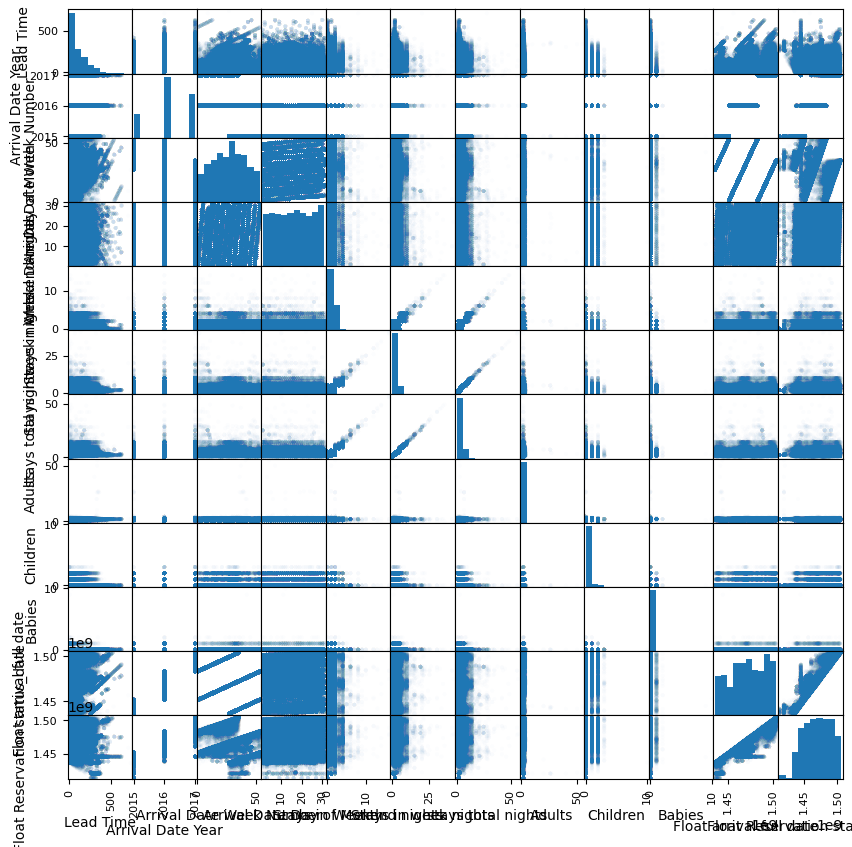

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = .01, figsize = (10, 10))
pass

**Избавление от выбросов:**

In [16]:
df['Lead Time'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      0.0
0.010      0.0
0.050      0.0
0.100      3.0
0.500     69.0
0.900    265.0
0.950    320.0
0.990    444.0
0.995    478.0
Name: Lead Time, dtype: float64

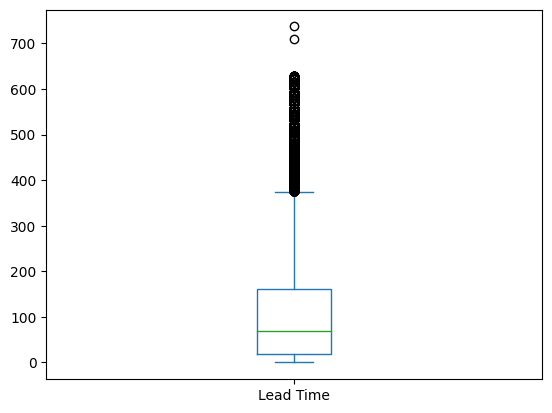

In [17]:
df['Lead Time'].plot(kind='box')
pass

Исключим 2 выбивающихся случая

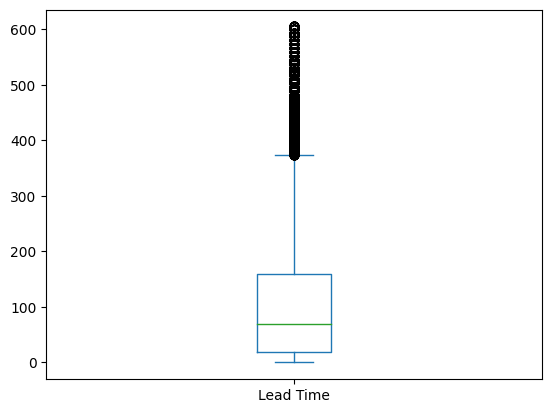

In [18]:
rowsToDrop = df[(df['Lead Time'] > df['Lead Time'].quantile(0.999))].index
dfclear = df.drop(rowsToDrop)
dfclear['Lead Time'].plot(kind='box')
pass

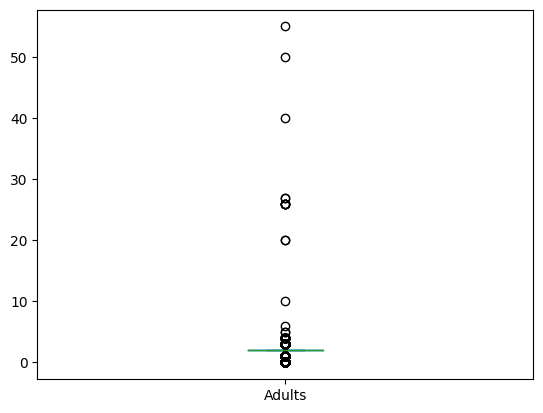

In [19]:
df['Adults'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])
df['Adults'].plot(kind='box')
pass

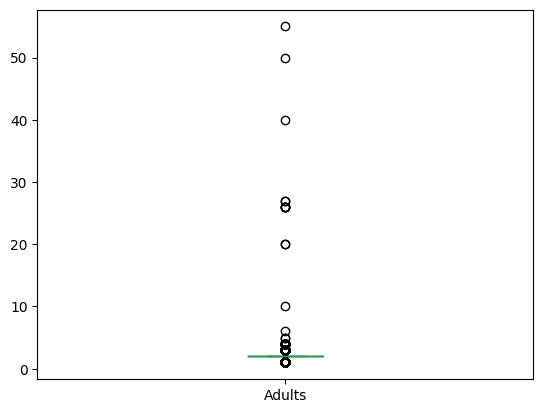

In [20]:
rowsToDrop = df[(df['Adults'] < df['Adults'].quantile(0.05))].index
dfclear = df.drop(rowsToDrop)
dfclear['Adults'].plot(kind='box')
pass

# **3. Обработка категориальных признаков**

Алгоритмы из библиотеки scikit-learn плохо работают с категориальными признаками напрямую.
Поэтому закодируем их с помощью числовых принаков.

In [21]:
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(dfclear[['Is Canceled', 'Arrival Date Month', 'Meal', 'Country', 'Reserved Room Type',
          'Assigned room type', 'customer type', 'Reservation Status']])

dummies = pd.DataFrame(enc.transform(dfclear[['Is Canceled', 'Arrival Date Month', 'Meal', 'Country', 'Reserved Room Type',
          'Assigned room type', 'customer type', 'Reservation Status']]),
                       columns=enc.get_feature_names_out(), index = dfclear.index)



In [22]:
dfclear = pd.concat((dfclear, dummies), axis=1).drop(['Is Canceled', 'Arrival Date Month', 'Meal', 'Country', 'Reserved Room Type',
          'Assigned room type', 'customer type', 'Reservation Status'], axis=1)
dfclear['Hotel'] = dfclear['Hotel'].replace({'Resort Hotel': 0, 'City Hotel': 1})
dfclear['Hotel'] = dfclear['Hotel'].astype('float64')

# **4. Разбиение выборки на обучающую и тестовую**

Разобъём выборку на обучающую (75% данных) и тестовую (25% данных).

In [23]:
y = dfclear['Hotel']
dfclear = dfclear.drop(columns=['Hotel'])
X_train, X_test, y_train, y_test = train_test_split(dfclear, y, test_size = 0.25, random_state = 11)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print("Разбили следующим образом:")
N_train, N_test

Разбили следующим образом:


(88878, 29627)

# **5. Масштабирование количественных признаков**
В данном случае масштабирование количественных признаков будет не лишним, поскольку, например, балл при поступлении варьируется от 0 до 200, а баллы за семестр – лишь от 0 до 20. Используем стандартизацию.
Стандартизация – линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

In [24]:
scaler = StandardScaler()

X_train_numerical = X_train[numerical_columns]
X_train_other = X_train.drop(numerical_columns, axis=1)

X_test_numerical = X_test[numerical_columns]
X_test_other = X_test.drop(numerical_columns, axis=1)

# Нормализация производится на основе данных только из обучающей выборки
scaler.fit(X_train_numerical)
# А затем применяется к обеим выборкам
X_train_numerical = pd.DataFrame(scaler.transform(X_train_numerical),
                                 columns=X_train_numerical.columns, index=X_train_numerical.index)
X_test_numerical = pd.DataFrame(scaler.transform(X_test_numerical),
                                 columns=X_test_numerical.columns, index=X_test_numerical.index)
# И получаем обновлённые выборки X_train и X_test
X_train = pd.concat((X_train_numerical, X_train_other), axis = 1)
X_test = pd.concat((X_test_numerical, X_test_other), axis = 1)
X_train

,Lead Time,Arrival Date Year,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,stays total nights,Adults,Children,Babies,...,Assigned room type_I,Assigned room type_K,Assigned room type_L,customer type_Contract,customer type_Group,customer type_Transient,customer type_Transient-Party,Reservation Status_Canceled,Reservation Status_Check-Out,Reservation Status_No-Show
39388,0.867213,1.191866,0.425254,-0.319839,1.076925,-0.265650,0.223581,0.238233,-0.255158,-0.08429,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
16907,-0.977805,-0.219376,-1.267363,-1.573944,-0.934062,-0.793033,-0.958704,0.238233,-0.255158,-0.08429,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3695,0.567515,-1.630619,1.897095,1.618322,-0.934062,0.789116,0.223581,-1.512381,-0.255158,-0.08429,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
54116,2.440629,-0.219376,0.057293,-1.003896,-0.934062,-0.265650,-0.564609,0.238233,-0.255158,-0.08429,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9885,-0.603182,1.191866,-1.782508,0.022189,0.071431,-0.265650,-0.170514,-1.512381,-0.255158,-0.08429,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98360,-0.228559,-0.219376,0.940398,1.162284,0.071431,-0.265650,-0.170514,-1.512381,-0.255158,-0.08429,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
73436,1.382319,1.191866,0.498846,0.592237,1.076925,1.316500,1.405866,0.238233,-0.255158,-0.08429,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
22044,-0.706203,-0.219376,-1.193771,-0.661868,1.076925,1.316500,1.405866,0.238233,-0.255158,-0.08429,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
37017,-0.528257,1.191866,-0.384259,-1.573944,-0.934062,-0.265650,-0.564609,0.238233,-0.255158,-0.08429,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# **6. Запуск регрессора, оценка ошибки, подбор гиперпараметров**

**Метод K-ближайших соседей**

Для задач регрессии, у которой все признаки отмасштабированы (процедура проведена выше) можно применить метод К-ближайших соседей

Пусть К(количество соседей) = 5

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_def = KNeighborsClassifier()
knn_def.fit(X_train, y_train)
knn_train_pred = 100 * knn_def.score(X_train, y_train)
knn_test_pred = 100 * knn_def.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 91.07%, Test: 86.63%. 


Уменьшим количество соседей до 3

In [26]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)
knn_train_pred = 100 * knn_3.score(X_train, y_train)
knn_test_pred = 100 * knn_3.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 93.30%, Test: 87.08%. 


Точность увеличилась. Вычислим среднеквадратическую ошибку для алгоритма с количеством ближайших соседей по умолчанию

In [27]:
knn_train_pred = knn_def.score(X_train, y_train)
knn_test_pred = knn_def.score(X_test, y_test)
MSE_train = np.mean((knn_train_pred - y_train)**2)
MSE_test  = np.mean((knn_test_pred - y_test)**2)
print("MSE. Train : {:.2f}, Test: {:.2f}. ".format(MSE_train, MSE_test))

MSE. Train : 0.28, Test: 0.26. 


# **Выводы**

В ходе выполнения данной лабораторной работы мы произвели анализ данных о ценовом диапазоне мобильных телефонов и решение задачи классификации с помощью моделей, которые были натренированы методом К-ближайших соседей. Также произвели обработку данных перед запуском алгоритмов обучения. Помимо этого, были проведены: работа с выбросами, обработка пропущенных значений, нормализация количественных признаков, выбор алгоритма классификации и проверка качества модели

# **Логистическая регрессия**

Ошибка на обучающем наборе: 0.19137469339994148
Ошибка на тестовом наборе: 0.18662031255273906


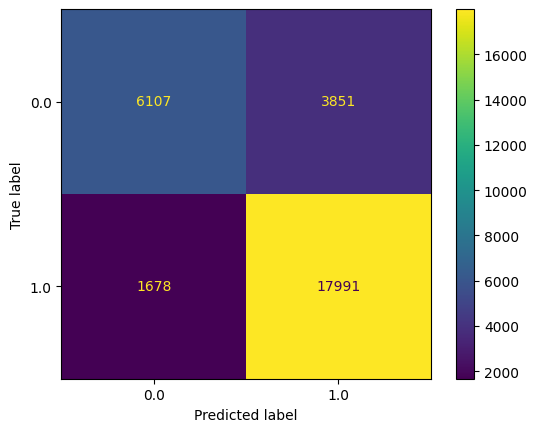

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log_reg = LogisticRegression(max_iter=4000)
log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)
err_train_lr = np.mean(y_train != y_train_predict)
err_test_lr = np.mean(y_test != y_test_predict)
print("Ошибка на обучающем наборе:", err_train_lr)
print("Ошибка на тестовом наборе:", err_test_lr)

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()

# **Random Forest**

Ошибка на обучающем наборе: 0.0015076846913746934
Ошибка на тестовом наборе: 0.09329327977858035


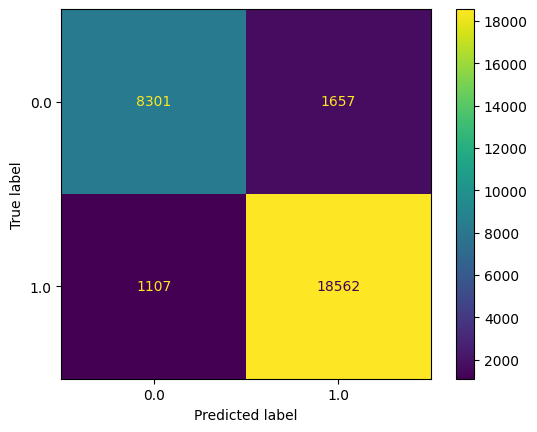

In [29]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000, random_state=42)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)
err_train_rf = np.mean(y_train != y_train_predict)
err_test_rf  = np.mean(y_test  != y_test_predict)
print("Ошибка на обучающем наборе:", err_train_rf)
print("Ошибка на тестовом наборе:", err_test_rf)

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

# **Полносвязная нейронная сеть с 1 скрытым слоем**

Ошибка на обучающем наборе: 0.10772069578523369
Ошибка на тестовом наборе: 0.13042157491477369


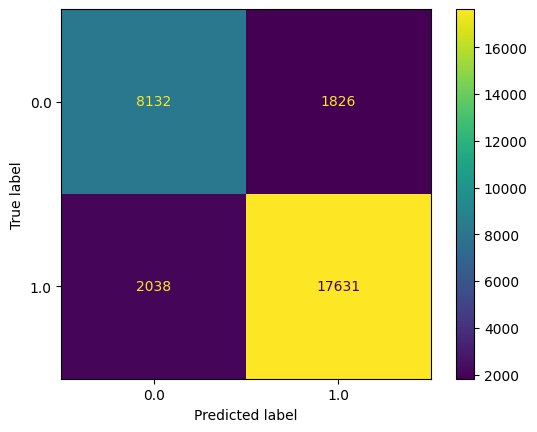

In [30]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_train_predict = mlp.predict(X_train)
y_test_predict = mlp.predict(X_test)
err_train_m = np.mean(y_train != y_train_predict)
err_test_m = np.mean(y_test != y_test_predict)


print("Ошибка на обучающем наборе:", err_train_m)
print("Ошибка на тестовом наборе:", err_test_m)

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()

# **Подбор гиперпараметров**

In [31]:
from sklearn.metrics import accuracy_score

train_acc = []
train_err = []
test_acc = []
test_err = []
alpha_arr = np.logspace(-3, 2, 21)

for alpha in alpha_arr:
    model = MLPClassifier(alpha=alpha,
                          hidden_layer_sizes=(100,),
                          max_iter=100)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    train_err.append(np.mean(y_train != y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    test_err.append(np.mean(y_test != y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

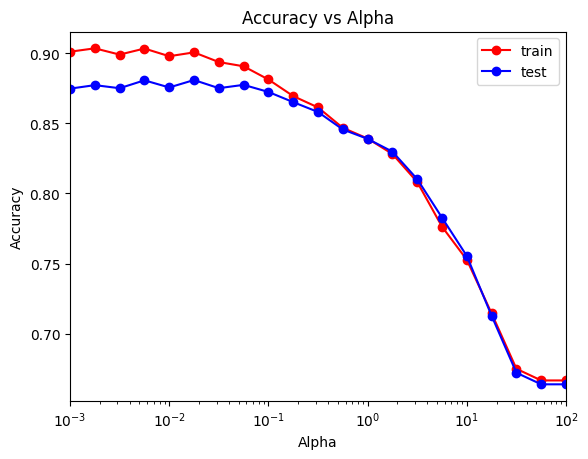

In [32]:
import matplotlib.pyplot as plt

plt.semilogx(alpha_arr, train_acc, "r-o", label="train")
plt.semilogx(alpha_arr, test_acc, "b-o", label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs Alpha')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
pass

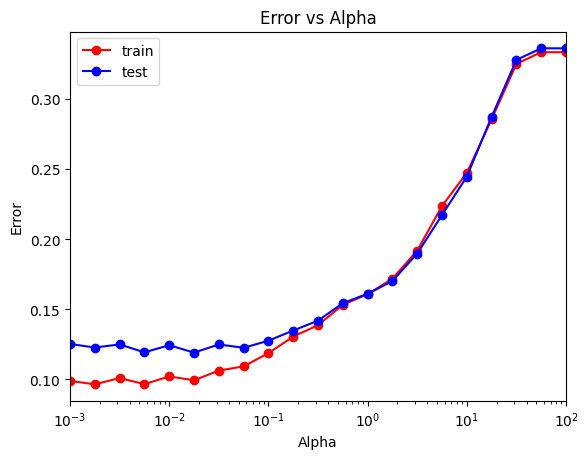

In [33]:
plt.semilogx(alpha_arr, train_err, "r-o", label="train")
plt.semilogx(alpha_arr, test_err, "b-o", label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs Alpha')
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend()
pass

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1],
    'hidden_layer_sizes': [(50), (60), (70), (80), (90), (100), (150)]
}

mlp = MLPClassifier(max_iter=100, random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Наилучшие параметры:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
best_params = grid_search.best_params_
best_mlp = MLPClassifier(max_iter=1000, random_state=42, **best_params)
best_mlp.fit(X_train, y_train)

y_train_predict = best_mlp.predict(X_train)
y_test_predict = best_mlp.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print("Ошибка на обучающем наборе:", err_train)
print("Ошибка на тестовом наборе:", err_test)

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_mlp.classes_)
disp.plot()
plt.show()

Проанализировав графики, можно прийти к выводу, что у нас не наблюдается ни недообучения, ни переобучения. Так как графики Error/Accuracy для train/test похожи, делаем вывод об одиноковом распределении тренировочных и тестовых данных.

Итого получилось:

Логистическая регрессия - Ошибка на обучающем наборе: 0.19137469339994148
Ошибка на тестовом наборе: 0.18662031255273906

Random Forest - Ошибка на обучающем наборе: 0.0015076846913746934 Ошибка на тестовом наборе: 0.09329327977858035

MLP - Ошибка на обучающем наборе: 0.10772069578523369 Ошибка на тестовом наборе: 0.13042157491477369

Хуже всего на обучающем наборе себя показала логистическая регрессия. MLP и RF показали схожие значения ошибки.

На тестовом наборе лучше всех себя показал Random Forest, а хуже - логистическая регрессия